In [1]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import NearMiss 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef, accuracy_score 
import seaborn as sns
import itertools
SEED=42

In [2]:
data =pd.read_csv('C:/Users/laura/OneDrive/Documents/MAG3/Semestre 1/Projet ML/cleaned_final.csv')

In [20]:
data.head()

,Claimant Age,Number Dependents,Weekly Wage,Percent Impairment,Post Injury Weekly Wage,Surgery Flag,Neurology Payment Flag,Neurosurgery Payment Flag,Dentist Payment Flag,Orthopedic Surgery Payment Flag,...,Industry ID_3,Industry ID_11,Industry ID_19,Industry ID_20,Industry ID_0,Industry ID_1,Claimant Age squared,Weekly Wage squared,Claimant Age cubic,Weekly Wage cubic
0,41,0,513.86,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1681,264052.1,68921,1.356858e+08
1,49,0,1186.00,10,0.0,0,0,0,0,1,...,0,0,0,0,0,0,2401,1406596.0,117649,1.668223e+09
2,35,0,300.00,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1225,90000.0,42875,2.700000e+07
3,30,0,600.00,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,900,360000.0,27000,2.160000e+08
4,41,0,385.07,6,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1681,148278.9,68921,5.709776e+07


In [3]:
SEED = 42
X_train, X_test, y_train, y_test=train_test_split(data.drop('Opiods Used', axis=1),
    data['Opiods Used'],test_size=0.2, stratify=data['Opiods Used'],
    shuffle=True,
    random_state=SEED)

#undersampling with NearMiss
SEED = 42
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)

In [4]:
X_train_miss.drop(['Claimant Age', 'Post Injury Weekly Wage', 'Neurology Payment Flag',
       'HCPCS M Codes', 'HCPCS Q Codes', 'HCPCS Y Codes', 'ICD Group 1',
       'ICD Group 3', 'ICD Group 4', 'ICD Group 7', 'ICD Group 8',
       'ICD Group 9', 'ICD Group 14', 'ICD Group 20', 'ICD Group 21',
       'Benefits State_TX', 'Benefits State_PA', 'Benefits State_MD',
       'Benefits State_IN', 'Benefits State_VA', 'Benefits State_AL',
       'Benefits State_NV', 'Benefits State_RI', 'Benefits State_DC',
       'Benefits State_KS', 'Benefits State_UT', 'Benefits State_NE',
       'Benefits State_WV', 'Benefits State_ME', 'Benefits State_MT',
       'Benefits State_LH', 'Benefits State_VT', 'Benefits State_WY',
       'Benefits State_JA', 'Benefits State_ND', 'SIC Group_services',
       'SIC Group_retail_trade', 'SIC Group_public_admi',
       'Disability Status_TTD', 'Disability Status_PTD', 'Claimant Sex_M',
       'Claimant Sex_F', 'Claimant Marital Status_U',
       'Employment Status Flag_L', 'Employment Status Flag_A',
       'Employment Status Flag_R', 'Employment Status Flag_B',
       'Employment Status Flag_C', 'Employment Status Flag_D',
       'NCCI BINatureOfLossDescription_Strain',
       'NCCI BINatureOfLossDescription_Sprain',
       'NCCI BINatureOfLossDescription_Skin',
       'NCCI BINatureOfLossDescription_Foreign Body',
       'Accident Type Group num_1', 'Accident Type Group num_4',
       'Accident Type Group num_11', 'Accident Type Group num_12',
       'Accident Type Group num_15', 'Accident Type Group num_14',
       'Accident Type Group num_13', 'Accident Type Group num_16',
       'Industry ID_14', 'Industry ID_13', 'Industry ID_16', 'Industry ID_12',
       'Industry ID_18', 'Industry ID_9', 'Industry ID_0', 'Industry ID_1',
       'Claimant Age squared', 'Weekly Wage squared', 'Weekly Wage cubic'], axis=1, inplace=True)

In [5]:
X_test.drop(['Claimant Age', 'Post Injury Weekly Wage', 'Neurology Payment Flag',
       'HCPCS M Codes', 'HCPCS Q Codes', 'HCPCS Y Codes', 'ICD Group 1',
       'ICD Group 3', 'ICD Group 4', 'ICD Group 7', 'ICD Group 8',
       'ICD Group 9', 'ICD Group 14', 'ICD Group 20', 'ICD Group 21',
       'Benefits State_TX', 'Benefits State_PA', 'Benefits State_MD',
       'Benefits State_IN', 'Benefits State_VA', 'Benefits State_AL',
       'Benefits State_NV', 'Benefits State_RI', 'Benefits State_DC',
       'Benefits State_KS', 'Benefits State_UT', 'Benefits State_NE',
       'Benefits State_WV', 'Benefits State_ME', 'Benefits State_MT',
       'Benefits State_LH', 'Benefits State_VT', 'Benefits State_WY',
       'Benefits State_JA', 'Benefits State_ND', 'SIC Group_services',
       'SIC Group_retail_trade', 'SIC Group_public_admi',
       'Disability Status_TTD', 'Disability Status_PTD', 'Claimant Sex_M',
       'Claimant Sex_F', 'Claimant Marital Status_U',
       'Employment Status Flag_L', 'Employment Status Flag_A',
       'Employment Status Flag_R', 'Employment Status Flag_B',
       'Employment Status Flag_C', 'Employment Status Flag_D',
       'NCCI BINatureOfLossDescription_Strain',
       'NCCI BINatureOfLossDescription_Sprain',
       'NCCI BINatureOfLossDescription_Skin',
       'NCCI BINatureOfLossDescription_Foreign Body',
       'Accident Type Group num_1', 'Accident Type Group num_4',
       'Accident Type Group num_11', 'Accident Type Group num_12',
       'Accident Type Group num_15', 'Accident Type Group num_14',
       'Accident Type Group num_13', 'Accident Type Group num_16',
       'Industry ID_14', 'Industry ID_13', 'Industry ID_16', 'Industry ID_12',
       'Industry ID_18', 'Industry ID_9', 'Industry ID_0', 'Industry ID_1',
       'Claimant Age squared', 'Weekly Wage squared', 'Weekly Wage cubic'], axis=1, inplace=True)

# KNN

#### Standardization :
Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. 
The gradient descent algorithm (which is used in neural network training and other machine learning algorithms) also converges faster with normalized features.
Here we have a few continous variables and a lot of binary ones, so it is better ( according to sebastien laurent) 

In [6]:
scaler = StandardScaler()
scaler.fit(X_train_miss)

X_train_miss = scaler.transform(X_train_miss)
X_test = scaler.transform(X_test)

### We first test a KNN model with all the defaults parameters to see how the model performs 

In [7]:
#test without any preselection of hyper parameters 

classifier = KNeighborsClassifier()
classifier.fit(X_train_miss,y_train_miss)
pred = classifier.predict(X_test)

print("the confusion matrix is :", confusion_matrix(y_test,pred))
print("the MCC is :", matthews_corrcoef(y_test, pred))
print("the AUC is :", roc_auc_score(y_test, pred))
print("the accuracy is :", accuracy_score(y_test, pred))

the confusion matrix is : [[18818  2566]
 [  591  2158]]
the MCC is : 0.532485420910387
the AUC is : 0.8325082365086811
the accuracy is : 0.8691832760120997


# Let's do some hyperparameters tunning so we can improve a bit the model. 

#### We wanted to test multiple parameters, we tried with Gridsearch :

In [22]:
leaf_size = list(range(25,50,2))
n_neighbors = list(range(1,16,2))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters,verbose = 3, cv=3)
#Fit the model
best_model = clf.fit(X_train_miss,y_train_miss)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Fitting 3 folds for each of 208 candidates, totalling 624 fits
[CV] leaf_size=25, n_neighbors=1, p=1 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... leaf_size=25, n_neighbors=1, p=1, score=0.623, total=   3.2s
[CV] leaf_size=25, n_neighbors=1, p=1 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] .... leaf_size=25, n_neighbors=1, p=1, score=0.660, total=   3.1s
[CV] leaf_size=25, n_neighbors=1, p=1 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


[CV] .... leaf_size=25, n_neighbors=1, p=1, score=0.607, total=   3.1s
[CV] leaf_size=25, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=25, n_neighbors=1, p=2, score=0.514, total=   3.9s
[CV] leaf_size=25, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=25, n_neighbors=1, p=2, score=0.577, total=   4.0s
[CV] leaf_size=25, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=25, n_neighbors=1, p=2, score=0.536, total=   3.6s
[CV] leaf_size=25, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=3, p=1, score=0.654, total=   3.2s
[CV] leaf_size=25, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=3, p=1, score=0.683, total=   3.3s
[CV] leaf_size=25, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=3, p=1, score=0.635, total=   4.1s
[CV] leaf_size=25, n_neighbors=3, p=2 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed: 24.2min finished


Best leaf_size: 29
Best p: 1
Best n_neighbors: 11


The best parameters here are : Best leaf_size: 29
Best p: 1
Best n_neighbors: 11

In [46]:
knn_2b = KNeighborsClassifier(leaf_size=29, n_neighbors=11, p=1)
knn_2b.fit(X_train_miss,y_train_miss)
pred = knn_2b.predict(X_test)

print(confusion_matrix(y_test,pred))
print(roc_auc_score(y_test, pred))

[[19685  1699]
 [  582  2167]]
0.8544173615083238


P = 1 it's equivalant to an manhattan_distance whereas p=2 is an euclidean_distance. So here we prefere manahttan distances
#### However, we want to try with other metrics like haming or canberra for example and see wich one is the best. (instead of the p parameter, to narrow our model

In [35]:
n_neighbors = [7,11,15,20]
leaf_size = [30,60,100]
metric=['euclidean', 'manhattan', 'hamming', 'canberra']

parameters_k1 = [n_neighbors,leaf_size, metric ]
parameters_k1 = list(itertools.product(*parameters_k1))
parameters_k1 #print all combinaisons

[(7, 30, 'euclidean'),
 (7, 30, 'manhattan'),
 (7, 30, 'hamming'),
 (7, 30, 'canberra'),
 (7, 60, 'euclidean'),
 (7, 60, 'manhattan'),
 (7, 60, 'hamming'),
 (7, 60, 'canberra'),
 (7, 100, 'euclidean'),
 (7, 100, 'manhattan'),
 (7, 100, 'hamming'),
 (7, 100, 'canberra'),
 (11, 30, 'euclidean'),
 (11, 30, 'manhattan'),
 (11, 30, 'hamming'),
 (11, 30, 'canberra'),
 (11, 60, 'euclidean'),
 (11, 60, 'manhattan'),
 (11, 60, 'hamming'),
 (11, 60, 'canberra'),
 (11, 100, 'euclidean'),
 (11, 100, 'manhattan'),
 (11, 100, 'hamming'),
 (11, 100, 'canberra'),
 (15, 30, 'euclidean'),
 (15, 30, 'manhattan'),
 (15, 30, 'hamming'),
 (15, 30, 'canberra'),
 (15, 60, 'euclidean'),
 (15, 60, 'manhattan'),
 (15, 60, 'hamming'),
 (15, 60, 'canberra'),
 (15, 100, 'euclidean'),
 (15, 100, 'manhattan'),
 (15, 100, 'hamming'),
 (15, 100, 'canberra'),
 (20, 30, 'euclidean'),
 (20, 30, 'manhattan'),
 (20, 30, 'hamming'),
 (20, 30, 'canberra'),
 (20, 60, 'euclidean'),
 (20, 60, 'manhattan'),
 (20, 60, 'hamming'),


In [36]:
len(parameters_k1) #48 combinaisons

48

In [37]:
conf_matrix_k1 = []
AUC_scores_k1 = []
MCC_scores_k1 = []

for i in range(len(parameters_k1)):
    knnlassifier = KNeighborsClassifier(n_neighbors= parameters_k1[i][0], leaf_size=parameters_k1[i][1], metric= parameters_k1[i][2])
    knnlassifier.fit(X_train_miss, y_train_miss)
    pred = knnlassifier.predict(X_test)
    conf_matrix_k1.append(confusion_matrix(y_test, pred))
    AUC_scores_k1.append(roc_auc_score(y_test, pred))
    MCC_scores_k1.append(matthews_corrcoef(y_test, pred))
      
    print(i, 'done')

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done


In [45]:
#Keep all the combinaisons and results just in case
for i in range(len(parameters_k1)):
    print(parameters_k1[i])
    print(AUC_scores_k1[i])

(7, 30, 'euclidean')
0.8282985977147491
(7, 30, 'manhattan')
0.855222912402796
(7, 30, 'hamming')
0.7808783679049635
(7, 30, 'canberra')
0.8958604662825389
(7, 60, 'euclidean')
0.8282985977147491
(7, 60, 'manhattan')
0.855222912402796
(7, 60, 'hamming')
0.7810368702587085
(7, 60, 'canberra')
0.8958604662825389
(7, 100, 'euclidean')
0.8282985977147491
(7, 100, 'manhattan')
0.855222912402796
(7, 100, 'hamming')
0.7810602522265349
(7, 100, 'canberra')
0.8958604662825389
(11, 30, 'euclidean')
0.8287217271267028
(11, 30, 'manhattan')
0.8544173615083238
(11, 30, 'hamming')
0.7764740268100075
(11, 30, 'canberra')
0.8960706828466822
(11, 60, 'euclidean')
0.8287217271267028
(11, 60, 'manhattan')
0.8544173615083238
(11, 60, 'hamming')
0.7762687605206097
(11, 60, 'canberra')
0.8960706828466822
(11, 100, 'euclidean')
0.8287217271267028
(11, 100, 'manhattan')
0.8544173615083238
(11, 100, 'hamming')
0.7761804040703438
(11, 100, 'canberra')
0.8960706828466822
(15, 30, 'euclidean')
0.8249848991103386


#### We check which combinaison has the higher AUC_score:

In [47]:
print(parameters_k1[AUC_scores_k1.index(max(AUC_scores_k1))])
print(max(AUC_scores_k1))
print(conf_matrix_k1[AUC_scores_k1.index(max(AUC_scores_k1))])     

(11, 30, 'canberra')
0.8960706828466822
[[19934  1450]
 [  385  2364]]


#### We have a better model than the one found before with gridsearch. We have the same number of neighbors of 11 and a leaf size of 30 but here we have the canberra metric, which is a weighted version of Manhattan distance ( p=1). Indeed the AUC score increases and we have less False Neg
#### We can try some other leaf size around 30 to be sure:

In [41]:
classifier = KNeighborsClassifier(n_neighbors= 11, leaf_size= 50, metric= 'canberra')
classifier.fit(X_train_miss,y_train_miss)
pred = classifier.predict(X_test)

print(confusion_matrix(y_test,pred))
print(matthews_corrcoef(y_test, pred))
print(roc_auc_score(y_test, pred))

[[19934  1450]
 [  385  2364]]
0.6899109310981038
0.8960706828466822


--> doesn't change anything can replace with hamming metric just to check : 

In [42]:
classifier = KNeighborsClassifier(n_neighbors= 11, leaf_size= 30, metric= 'hamming')
classifier.fit(X_train_miss,y_train_miss)
pred = classifier.predict(X_test)

print(confusion_matrix(y_test,pred))
print(matthews_corrcoef(y_test, pred))
print(roc_auc_score(y_test, pred))

[[20731   653]
 [ 1145  1604]]
0.6033460024289605
0.7764740268100075


--> Not really good and not really relevant. We'll keep this combinaison (11, 30, 'canberra')

### To be sure on the optimal k 

In [51]:
auc = []
# Will take some time

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn3 = KNeighborsClassifier(n_neighbors=i, leaf_size= 30, metric= 'canberra')
    knn3.fit(X_train_miss,y_train_miss)
    pred_i = knn3.predict(X_test)
    auc.append(roc_auc_score(y_test, pred_i))

Text(0, 0.5, 'AUC score')

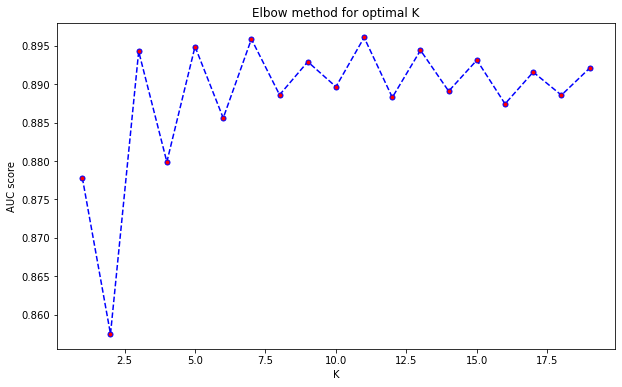

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),auc,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=5)
plt.title('Elbow method for optimal K')
plt.xlabel('K')
plt.ylabel('AUC score')

The optimal K seems to be arount 10/11 let's check for k=10 

In [53]:
#Chech for k=10 
classifier = KNeighborsClassifier(n_neighbors= 10, leaf_size= 30, metric= 'canberra')
classifier.fit(X_train_miss,y_train_miss)
pred = classifier.predict(X_test)

print(confusion_matrix(y_test,pred))
print(matthews_corrcoef(y_test, pred))
print(roc_auc_score(y_test, pred))

#with k=10 the AUC is less good than when k=11

[[20103  1281]
 [  442  2307]]
0.6959252776653296
0.8896548290797714


In [54]:
#Chech for k=12
classifier = KNeighborsClassifier(n_neighbors= 12, leaf_size= 30, metric= 'canberra')
classifier.fit(X_train_miss,y_train_miss)
pred = classifier.predict(X_test)

print(confusion_matrix(y_test,pred))
print(matthews_corrcoef(y_test, pred))
print(roc_auc_score(y_test, pred))

#with k=12 the AUC is less good than when k=11

[[20106  1278]
 [  450  2299]]
0.6943313716227767
0.8882699004106789


## Our final KNN model is the one with K=11, leaf_size=30 and 'canberra' metric:

In [55]:
knn_classifier = KNeighborsClassifier(n_neighbors=11, leaf_size= 30, metric= 'canberra')
knn_classifier.fit(X_train_miss,y_train_miss)

Metrics on the test set :

In [58]:
print("the confusion matrix is :", confusion_matrix(y_test,knn_classifier.predict(X_test)))
print("the MCC is :", matthews_corrcoef(y_test, knn_classifier.predict(X_test)))
print("the AUC is :", roc_auc_score(y_test, knn_classifier.predict(X_test)))
print("the accuracy is :", accuracy_score(y_test, knn_classifier.predict(X_test)))

the confusion matrix is : [[19934  1450]
 [  385  2364]]
the MCC is : 0.6899109310981038
the AUC is : 0.8960706828466822
the accuracy is : 0.9239630381635106


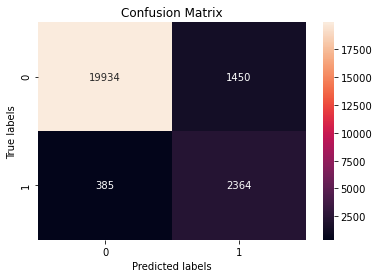

In [61]:
cm=confusion_matrix(y_test,knn_classifier.predict(X_test))
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

Metrics on the trainning set : 

In [59]:
print("the MCC is :", matthews_corrcoef(y_train_miss, knn_classifier.predict(X_train_miss)))
print("the AUC is :", roc_auc_score(y_train_miss, knn_classifier.predict(X_train_miss)))
print("the accuracy is :", accuracy_score(y_train_miss, knn_classifier.predict(X_train_miss)))

the MCC is : 0.8513050663702788
the AUC is : 0.9222373806275579
the accuracy is : 0.922237380627558
